In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7890 entries, 0 to 7889
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          7890 non-null   int64  
 1   customer            7890 non-null   object 
 2   invoice_date        7890 non-null   object 
 3   qty_shipped         7890 non-null   float64
 4   item                7890 non-null   object 
 5   description         7878 non-null   object 
 6   item_price          7890 non-null   float64
 7   customer.1          7890 non-null   object 
 8   industry            7890 non-null   object 
 9   contact_owner       7890 non-null   object 
 10  lifetime_sales      7890 non-null   float64
 11  first_sale          7890 non-null   object 
 12  county              7890 non-null   object 
 13  market_opportunity  7890 non-null   float64
 14  %_market_opp        7890 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 924.7+

In [5]:
data.drop(['Unnamed: 0','customer.1'], axis=1, inplace=True)
data['invoice_date'] = pd.to_datetime(data['invoice_date'])
data['first_sale'] = pd.to_datetime(data['first_sale'])

In [6]:
data['industry'] = data['industry'].astype('category')
data['contact_owner'] = data['contact_owner'].astype('category')
data['county'] = data['county'].astype('category')

In [7]:
data.head()

,customer,invoice_date,qty_shipped,item,description,item_price,industry,contact_owner,lifetime_sales,first_sale,county,market_opportunity,%_market_opp
0,1HOLPS,2015-05-08,1.0,T3000,MOTO MTR3000 BASE RADIO,6020.8,K12 Education,Keith Johnson,39760.49,1999-11-01,Ottawa,825673.0,0.309
1,1VANAI,2015-04-17,2.0,AAM27QNH9LA1,XPR 4550 403-470 1-25W 160 CH,681.0,Healthcare,Skip Petrovich,25907.89,2004-10-25,Kent,1601574.0,0.421
2,1VANAI,2015-04-17,2.0,SEC1223MOTOTRBO,SAMLEX BASE STATION PWR SUPPLY,156.0,Healthcare,Skip Petrovich,25907.89,2004-10-25,Kent,1601574.0,0.421
3,1VANAI,2015-04-17,2.0,0180355A80,SPECTRUM MAGNETIC MNT MINIUHF,28.5,Healthcare,Skip Petrovich,25907.89,2004-10-25,Kent,1601574.0,0.421
4,1VANAI,2015-04-17,2.0,0180352A11,ANTENNA 1/4 WAVE 450-470 MHZ,12.0,Healthcare,Skip Petrovich,25907.89,2004-10-25,Kent,1601574.0,0.421


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7890 entries, 0 to 7889
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer            7890 non-null   object        
 1   invoice_date        7890 non-null   datetime64[ns]
 2   qty_shipped         7890 non-null   float64       
 3   item                7890 non-null   object        
 4   description         7878 non-null   object        
 5   item_price          7890 non-null   float64       
 6   industry            7890 non-null   category      
 7   contact_owner       7890 non-null   category      
 8   lifetime_sales      7890 non-null   float64       
 9   first_sale          7890 non-null   datetime64[ns]
 10  county              7890 non-null   category      
 11  market_opportunity  7890 non-null   float64       
 12  %_market_opp        7890 non-null   float64       
dtypes: category(3), datetime64[ns](2), float64(5), o

# 1) What is the time frame of the sales data I have?

In [9]:
data[['invoice_date']].describe()

,invoice_date
count,7890
unique,367
top,2017-11-22 00:00:00
freq,121
first,2015-01-23 00:00:00
last,2020-09-30 00:00:00


In [10]:
# First sale
data[data['invoice_date']=='2015-01-23'][:3]

,customer,invoice_date,qty_shipped,item,description,item_price,industry,contact_owner,lifetime_sales,first_sale,county,market_opportunity,%_market_opp
28,4BERSH,2015-01-23,1.0,RRA4983,ANTENNA/ MOBILE 806-900 MHZ,57.5,Government Services,Tom Gillespie,563431.43,1999-11-01,Berrien,510290.0,0.291
29,4BERSH,2015-01-23,1.0,MISC50,MISCELLANEOUS HARDWARE,50.0,Government Services,Tom Gillespie,563431.43,1999-11-01,Berrien,510290.0,0.291
39,1EATSD,2015-01-23,6.0,AAM25RKF9DP6,CDM1550LS+ 160CH 40W MOBILE,704.0,Law Enforcement,Skip Petrovich,19627.32,2007-12-20,Eaton,365290.0,0.120


In [11]:
# Final sales
data[data['invoice_date']=='2020-09-30'][:3]

,customer,invoice_date,qty_shipped,item,description,item_price,industry,contact_owner,lifetime_sales,first_sale,county,market_opportunity,%_market_opp
7595,4MICPD,2020-09-30,1.0,B5705T15,PRO-GARD REAR CARGO BARRIER,450.0,Law Enforcement,Tom Gillespie,7203.42,2006-09-06,Berrien,510290.0,0.291
7596,4MICPD,2020-09-30,1.0,MISC150,MISCELLANEOUS HARDWARE,150.0,Law Enforcement,Tom Gillespie,7203.42,2006-09-06,Berrien,510290.0,0.291
7597,4MICPD,2020-09-30,1.0,ES100C,FED SIG EMERG SPKR 100W,230.0,Law Enforcement,Tom Gillespie,7203.42,2006-09-06,Berrien,510290.0,0.291


In [12]:
# Create a year column
data['year'] = data.invoice_date.dt.year

In [13]:
# Create a total sale amount column
data['total_sale'] = data['qty_shipped'] * data['item_price']

In [14]:
sales_by_year = data.groupby('year')['total_sale'].sum()

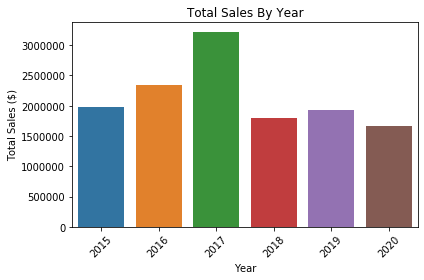

In [15]:
sns.barplot(x=sales_by_year.index, y=sales_by_year.values)

plt.title('Total Sales By Year')
plt.xlabel('Year')
plt.ylabel('Total Sales ($)')

plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('sales_by_year.png')

# 2) Top Customers during that time frame

In [16]:
customers = data.groupby('customer')['total_sale'].sum()

In [17]:
customers.head()

customer
1ADACO      6460.66
1ALLCD    645753.34
1ALLFD      5337.00
1ALLSO      7560.00
1ALLTF      8890.75
Name: total_sale, dtype: float64

In [18]:
customers.sort_values(ascending=False, inplace=True)
customers.values[:15]

array([1129461.85 ,  908901.12 ,  808393.342,  645753.34 ,  415209.11 ,
        404867.72 ,  319750.   ,  299916.69 ,  269776.9  ,  246227.6  ,
        243557.26 ,  219609.46 ,  218093.47 ,  183709.2  ,  164365.07 ])

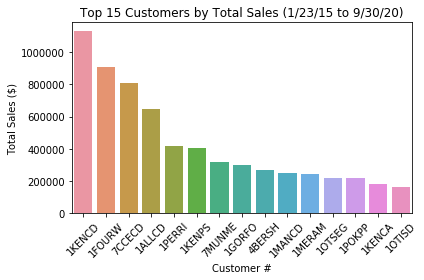

In [19]:
sns.barplot(x=customers.index[:15], y=customers.values[:15])

plt.title('Top 15 Customers by Total Sales (1/23/15 to 9/30/20)')
plt.xlabel('Customer #')
plt.ylabel('Total Sales ($)')

plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('top_customers.png')

In [20]:
total_sales = data['total_sale'].sum()
total_sales

12919911.408299997

In [21]:
top_sales = customers.max()
top_sales

1129461.85

In [22]:
top_sales/total_sales

0.08742024726844584

In [23]:
top4_sales = customers[:4].sum()

In [24]:
print(top4_sales)
print(top4_sales/total_sales)

3492509.652
0.2703199380884566


In [25]:
top15_sales = customers[:15].sum()
print(top15_sales)
print(top15_sales/total_sales)

6477592.132
0.5013650579553256


# 3) Create the 6 Box plot

Need sales by year columns

In [26]:
# Create a function that takes in a year and returns the total sales for a specific customer in that year
def sales_by_year(customer, year):
    df = data[data['customer']==customer]
    return df.groupby('year')['total_sale'].sum().loc[year]

In [27]:
# Create a data frame that has each customer, and the total yearly sales for each year for that customer
customer_list = [x for x in customers.index]
years = [2015, 2016, 2017, 2018, 2019]

sales_2015 = []
sales_2016 = []
sales_2017 = []
sales_2018 = []
sales_2019 = []

list_of_lists = [sales_2015, sales_2016, sales_2017, sales_2018, sales_2019]

for customer in customer_list:
    for i,year in enumerate(years):
        try:
            list_of_lists[i].append(sales_by_year(customer, year))
        except:
            list_of_lists[i].append(0)

In [28]:
            
# Create dictionary from lists:
yearly_dict = {'customer': customer_list,
                   '2015_sales' : sales_2015,
                   '2016_sales' : sales_2016,
                   '2017_sales' : sales_2017,
                   '2018_sales' : sales_2018,
                   '2019_sales' : sales_2019
              }

df = pd.DataFrame(yearly_dict)

In [29]:
df.head()

,customer,2015_sales,2016_sales,2017_sales,2018_sales,2019_sales
0,1KENCD,0.000,0.00,1129461.85,0.00,0.00
1,1FOURW,26569.000,46535.00,537131.62,170326.00,118310.00
2,7CCECD,724561.112,79892.23,3940.00,0.00,0.00
3,1ALLCD,440.840,645312.50,0.00,0.00,0.00
4,1PERRI,35122.060,35438.49,92253.82,217995.84,29016.09


In [30]:
# How many different customers by year
def num_sales_by_year(col_name):
    return df[df[col_name]>0][col_name].count()

years = [2015, 2016, 2017, 2018, 2019]
columns = list(df.columns)
num_customers = [num_sales_by_year(x) for x in columns[1:]]

In [31]:
num_customers

[170, 167, 170, 197, 206]

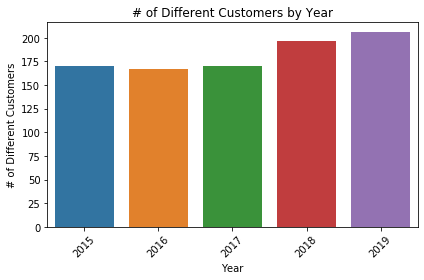

In [97]:
# Plot count of customers by year
sns.barplot(x=years, y=num_customers)

plt.title('# of Different Customers by Year')
plt.xlabel('Year')
plt.ylabel('# of Different Customers')

plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('customers_by_year.png')

In [100]:
# Find the IQR range of 2018, use those for cut offs
df[df['2018_sales']>0]['2018_sales'].describe()

count       197.000000
mean       9123.916294
std       31188.445729
min          29.960000
25%        1068.000000
50%        2290.000000
75%        5989.500000
max      330924.590000
Name: 2018_sales, dtype: float64

In [111]:
# That will be too low, will use these as the threshholds
threshold_1 = 10000
threshold_2 = 30000

In [112]:
# reprint df to remind of layout
df.head(2)

,customer,2015_sales,2016_sales,2017_sales,2018_sales,2019_sales
0,1KENCD,0.0,0.0,1129461.85,0.0,0.0
1,1FOURW,26569.0,46535.0,537131.62,170326.0,118310.0


In [113]:
df[(df['2015_sales']>0) & (df['2015_sales']<threshold_1)]['customer'].count()

143

In [115]:
lows = []
meds = []
highs = []

# Create count of lows
for col in columns[1:]:
    lows.append(df[(df[col]>0) & (df[col]<threshold_1)]['customer'].count())
    
# Create count of meds
for col in columns[1:]:
    meds.append(df[(df[col]>threshold_1) & (df[col]<threshold_2)]['customer'].count())
    
# Create count of highs
for col in columns[1:]:
    highs.append(df[df[col]>threshold_2]['customer'].count())

In [116]:
# Check
print(lows, meds, highs)

[143, 132, 136, 170, 165] [17, 21, 18, 18, 20] [10, 14, 16, 9, 21]


# 4) Groupings - by vertical

In [117]:
data.head(2)

,customer,invoice_date,qty_shipped,item,description,item_price,industry,contact_owner,lifetime_sales,first_sale,county,market_opportunity,%_market_opp,total_sale,year,2017_sales,2018_sales,2019_sales
0,1HOLPS,2015-05-08,1.0,T3000,MOTO MTR3000 BASE RADIO,6020.8,K12 Education,Keith Johnson,39760.49,1999-11-01,Ottawa,825673.0,0.309,6020.8,2015,2466.0,850.0,10031.0
1,1HOLPS,2015-05-08,1.0,MISC200,MISCELLANEOUS HARDWARE,200.0,K12 Education,Keith Johnson,39760.49,1999-11-01,Ottawa,825673.0,0.309,200.0,2015,2466.0,850.0,10031.0


In [124]:
# Total sales by vertical
sales_by_vertical = data.groupby('industry')['total_sale'].sum()
sales_by_vertical.sort_values(ascending=False, inplace=True)

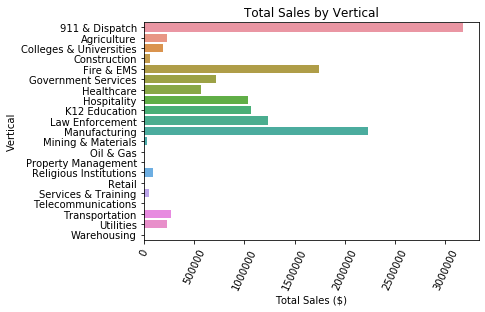

In [143]:
# Plot count of customers by year
sns.barplot(y=sales_by_vertical.sort_values(ascending=False).index, 
            x=sales_by_vertical.sort_values(ascending=False).values)

plt.title('Total Sales by Vertical')
plt.ylabel('Vertical')
plt.xlabel('Total Sales ($)')

plt.xticks(rotation=65)

plt.savefig('sales_by_vertical.png')

In [139]:
# Plot number of customers in vertical by total sales in vertical (scatterplot)
vertical_sales = sales_by_vertical.values
vertical_count = []

# count each vertical
for vert in sales_by_vertical.index:
    vertical_count.append(data[data['industry']==vert]['customer'].count())

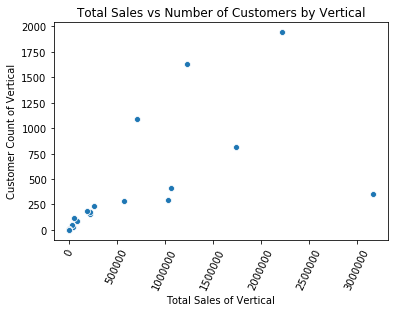

In [140]:
sns.scatterplot(x=vertical_sales, y=vertical_count)

plt.title('Total Sales vs Number of Customers by Vertical')
plt.xlabel('Total Sales of Vertical')
plt.ylabel('Customer Count of Vertical')

plt.xticks(rotation=65)

plt.savefig('sales_vs_count_vertical.png')

In [141]:
# Plot Avg Sales by Vertical
# Avg sales by vertical
avg_sales_by_vertical = data.groupby('industry')['total_sale'].mean()
avg_sales_by_vertical.sort_values(ascending=False, inplace=True)

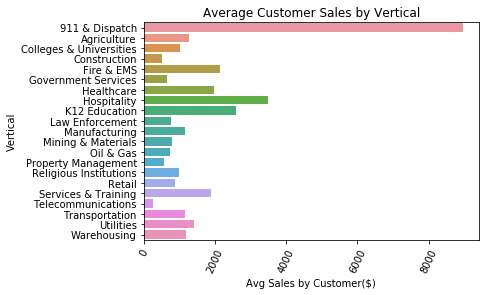

In [144]:
# Plot avg sales by vertical
sns.barplot(y=avg_sales_by_vertical.sort_values(ascending=False).index, 
            x=avg_sales_by_vertical.sort_values(ascending=False).values)

plt.title('Average Customer Sales by Vertical')
plt.ylabel('Vertical')
plt.xlabel('Avg Sales by Customer($)')

plt.xticks(rotation=65)

plt.savefig('avg_sales_by_vertical.png')

# Groupings - by county

In [153]:
# Total sales by county
sales_by_county = data.groupby('county')['total_sale'].sum()
sales_by_county.sort_values(ascending=False, inplace=True)

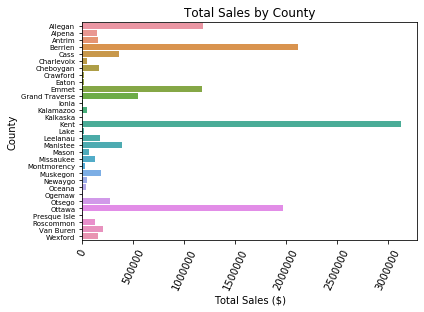

In [168]:
# Plot total sales by county
sns.barplot(y=sales_by_county.sort_values(ascending=False).index, 
            x=sales_by_county.sort_values(ascending=False).values)

plt.title('Total Sales by County')
plt.ylabel('County')
plt.xlabel('Total Sales ($)')
plt.yticks(fontsize=7)

plt.xticks(rotation=65)

plt.savefig('sales_by_county.png')

In [154]:
# Plot Avg Sales by County

# Avg sales by county
avg_sales_by_county = data.groupby('county')['total_sale'].mean()
avg_sales_by_county.sort_values(ascending=False, inplace=True)

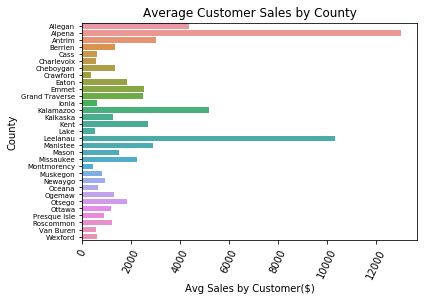

In [156]:
# Plot avg sales by count
sns.barplot(y=avg_sales_by_county.sort_values(ascending=False).index, 
            x=avg_sales_by_county.sort_values(ascending=False).values)

plt.title('Average Customer Sales by County')
plt.ylabel('County')
plt.xlabel('Avg Sales by Customer($)')
plt.yticks(fontsize=7)

plt.xticks(rotation=65)

plt.savefig('avg_sales_by_county.png')

# Groupings - by rep

In [165]:
# Total sales by rep
sales_by_rep = data.groupby('contact_owner')['total_sale'].sum()
sales_by_rep.sort_values(ascending=False, inplace=True)

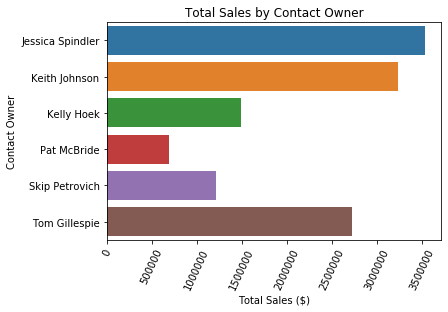

In [167]:
# Plot total sales by rep
sns.barplot(y=sales_by_rep.sort_values(ascending=False).index, 
            x=sales_by_rep.sort_values(ascending=False).values)

plt.title('Total Sales by Contact Owner')
plt.ylabel('Contact Owner')
plt.xlabel('Total Sales ($)')

plt.xticks(rotation=65)

plt.savefig('sales_by_rep.png')

In [169]:
# Avg sales by rep
avg_sales_by_rep = data.groupby('contact_owner')['total_sale'].mean()
avg_sales_by_rep.sort_values(ascending=False, inplace=True)

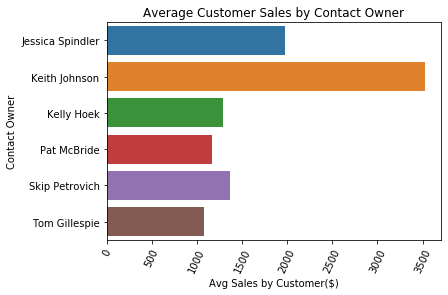

In [170]:
# Plot avg sales by rep
sns.barplot(y=avg_sales_by_rep.sort_values(ascending=False).index, 
            x=avg_sales_by_rep.sort_values(ascending=False).values)

plt.title('Average Customer Sales by Contact Owner')
plt.ylabel('Contact Owner')
plt.xlabel('Avg Sales by Customer($)')

plt.xticks(rotation=65)

plt.savefig('avg_sales_by_rep.png')

# 5) Break outs by Item

In [ ]:
# Find the graphs/plots I created in my Step 4 - and start there

# one specific thing: plot number of sales of item (count) by its avg price